# Mushroom Classification 
                                                                                                 


## Define Project

* Project link on Kaggle website:
 https://www.kaggle.com/datasets/uciml/mushroom-classification

* About the Challenge: 

The Mushroom Classification challenge involves predicting whether a given mushroom is edible or poisonous based on its physical characteristics. The dataset includes detailed attributes for over 8,000 samples from 23 species of gilled mushrooms in the Agaricus and Lepiota families. Each mushroom is labeled as either "edible" or "poisonous".The goal is to build a machine learning model that can accurately classify mushrooms and identify which features are most indicative of toxicity. 

* About the data:

The dataset contains 8,124 instances of mushrooms, each described by 22 categorical features such as cap shape, gill color, odor, spore print color, and more. The target variable is “class,” which indicates whether a mushroom is edible (e) or poisonous (p). 

## Data Loading and Initial Look



In [40]:
import pandas as pd

# Load the dataset
filename = "mushrooms.csv"
df = pd.read_csv(filename)
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [41]:
num_rows, num_features = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of features: {num_features}")


Number of rows: 8124
Number of features: 23


In [42]:
missing_values = df.isnull().sum()

print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


No initial missing values found in the dataset.

* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
    * How many missing values
    

In [64]:
from IPython.display import display, HTML
feature_summary = []

for col in df.columns:
    feature_type = 'Categorical' if df[col].dtype == 'object' else 'Numerical'
    unique_values = sorted(df[col].unique())
    num_missing = df[col].isnull().sum()
    
    # For categorical, listing unique values
    if feature_type == 'Categorical':
        values_repr = ', '.join(unique_values)
    else:                                          # For numerical, giving range
        values_repr = f"{df[col].min()} to {df[col].max()}"
    
    feature_summary.append({
        'Feature': col,
        'Type': feature_type,
        'Values': values_repr,
        'Missing Values': num_missing
    })

# Convert to DataFrame
summary_df = pd.DataFrame(feature_summary)
print("\nFeature Summary Table:")
print(summary_df)
      


Feature Summary Table:
                     Feature         Type                              Values  \
0                      class  Categorical                                e, p   
1                  cap-shape  Categorical                    b, c, f, k, s, x   
2                cap-surface  Categorical                          f, g, s, y   
3                  cap-color  Categorical        b, c, e, g, n, p, r, u, w, y   
4                    bruises  Categorical                                f, t   
5                       odor  Categorical           a, c, f, l, m, n, p, s, y   
6            gill-attachment  Categorical                                a, f   
7               gill-spacing  Categorical                                c, w   
8                  gill-size  Categorical                                b, n   
9                 gill-color  Categorical  b, e, g, h, k, n, o, p, r, u, w, y   
10               stalk-shape  Categorical                                e, t   
11  

* Do you see any outliers?
        * Define outlier.
        
Since all features in this dataset are categorical, numerical outlier detection doesn’t apply.
We will explore any unusual or rare values later during the visualization stage.

* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [44]:
# Target column
target_col = "class"

# Checking Distribution of classes
class_counts = df[target_col].value_counts()
class_percent = df[target_col].value_counts(normalize=True) * 100

print("Class Distribution:")
print(class_counts)
print("\nClass Distribution (%):")
print(class_percent.round(2))

# Unique values in Target col (encoded)
print("\nClasses:", df[target_col].unique())

Class Distribution:
class
e    4208
p    3916
Name: count, dtype: int64

Class Distribution (%):
class
e    51.8
p    48.2
Name: proportion, dtype: float64

Classes: ['p' 'e']


There is no significant class imbalance. The dataset has 51.8% edible (e) mushrooms and 48.2% poisonous (p) mushrooms which is a fairly balanced distribution.
The target variable is class which represents whether a mushroom is edible (e) or poisonous (p).
This is a classification problem and the target is currently encoded using characters 'e' for edible and 'p' for poisonous.

## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.

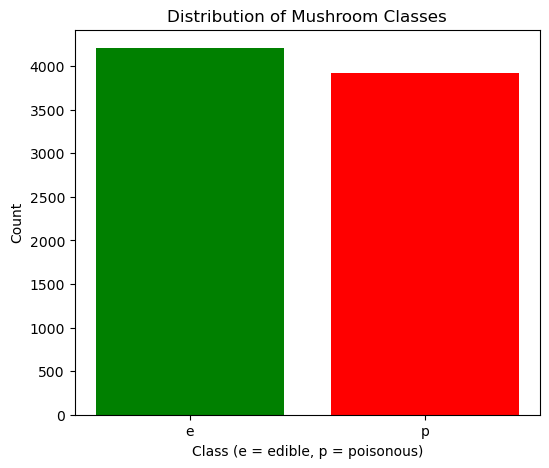

In [45]:
# Class Distribution
import matplotlib.pyplot as plt

# Count the number of each class
class_counts = df['class'].value_counts()
labels = class_counts.index
counts = class_counts.values

# Plot histogram for class distribution
plt.figure(figsize=(6, 5))
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class (e = edible, p = poisonous)')
plt.ylabel('Count')
plt.show()

### Attribute Information (Feature Key):

The dataset uses single-letter codes for each feature. The following table explains what each code represents:

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

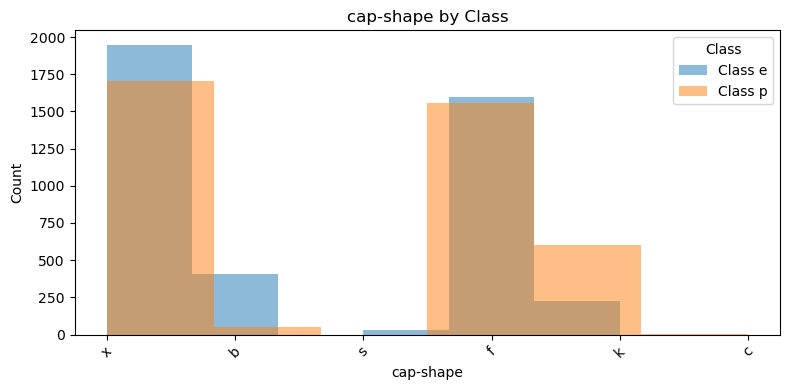

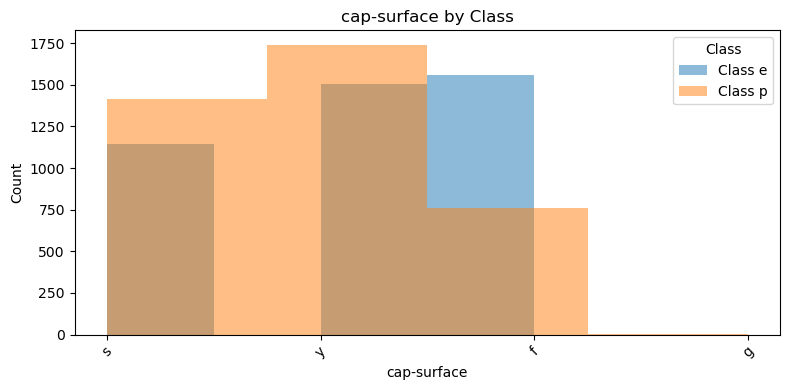

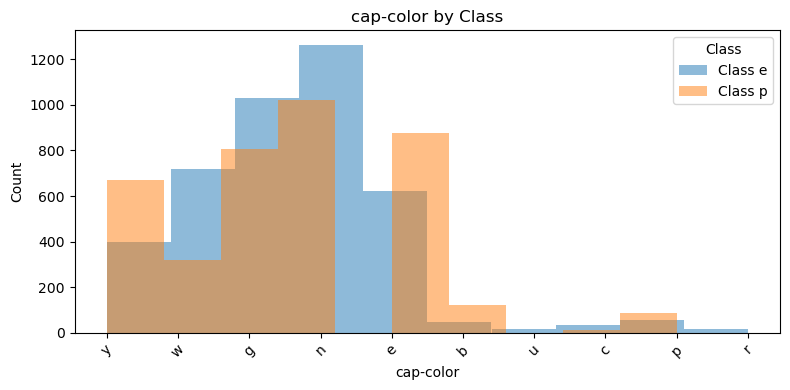

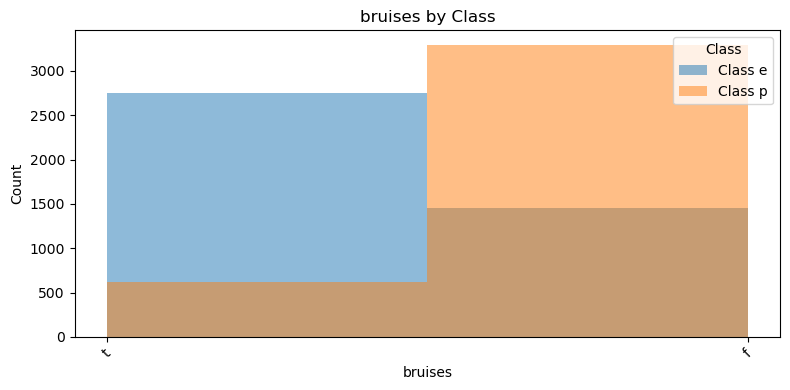

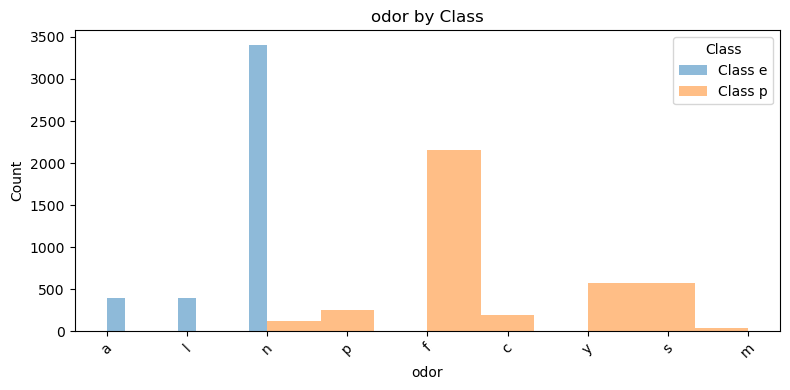

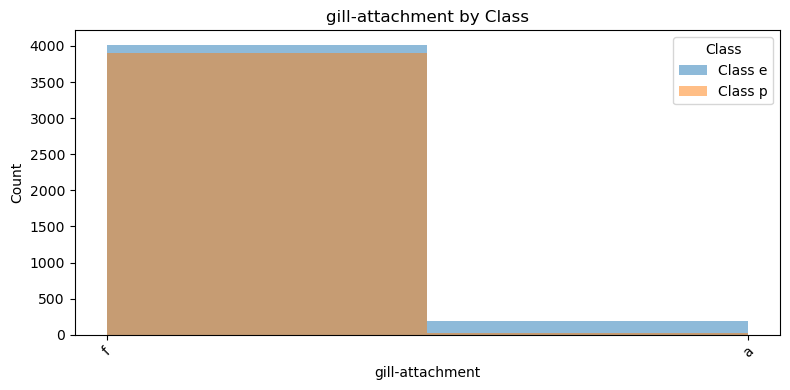

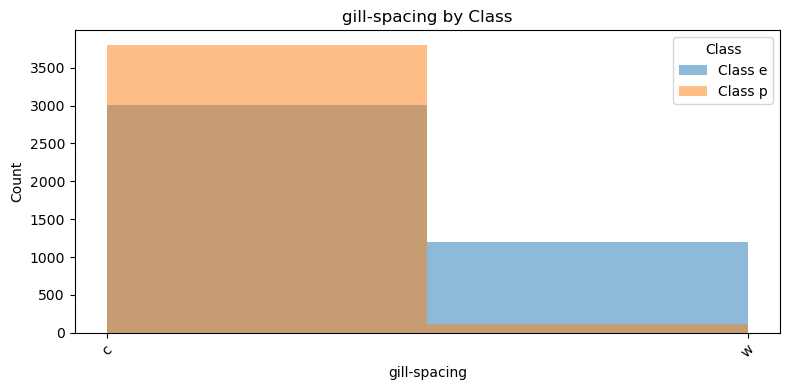

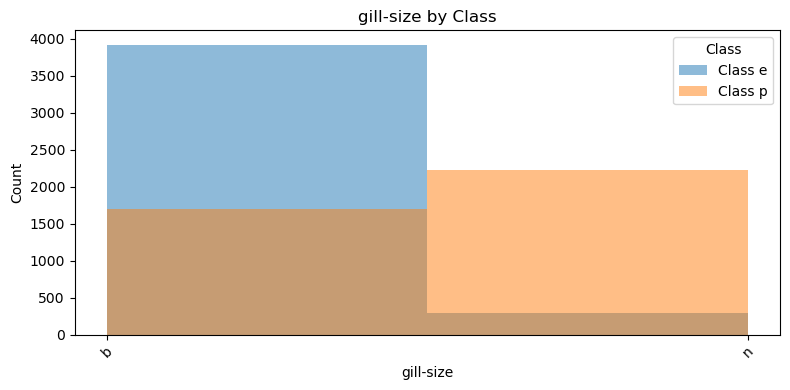

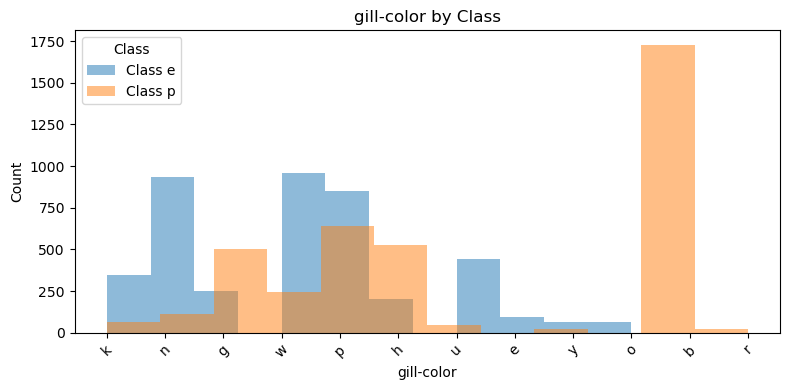

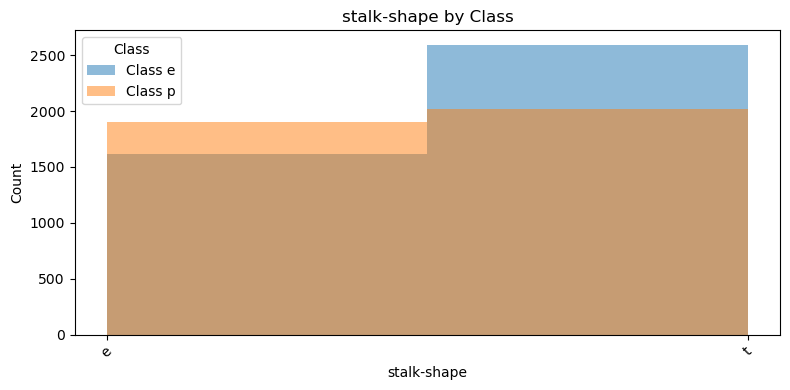

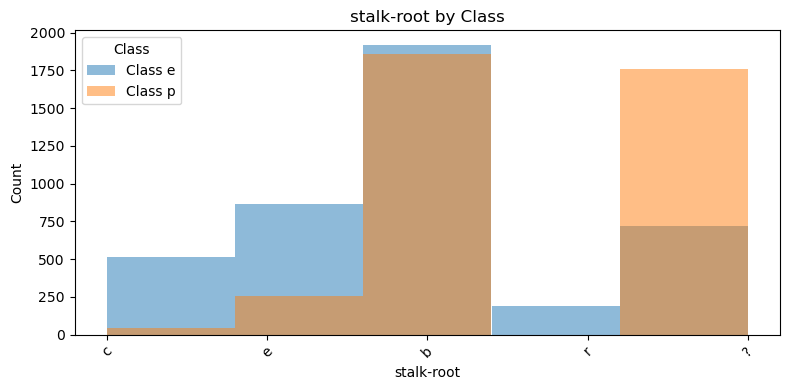

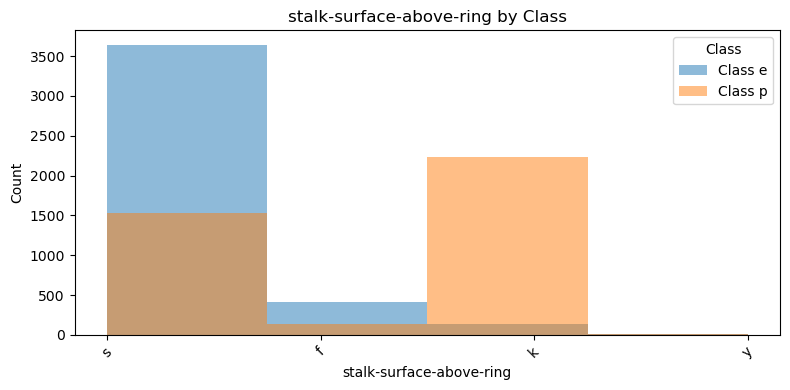

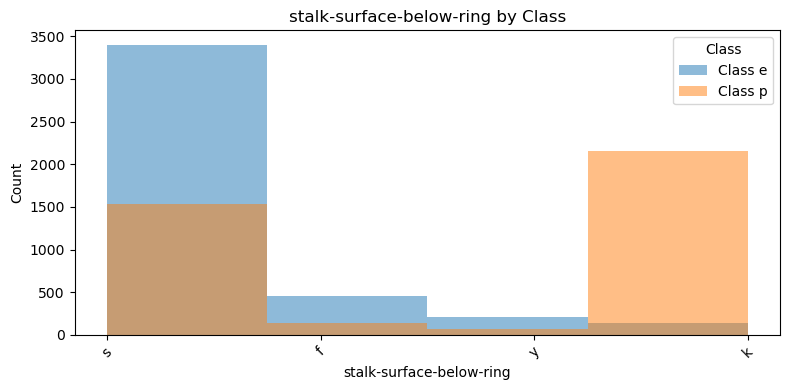

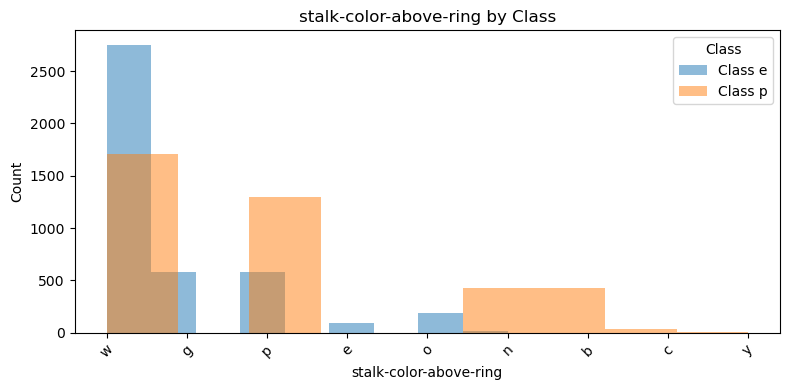

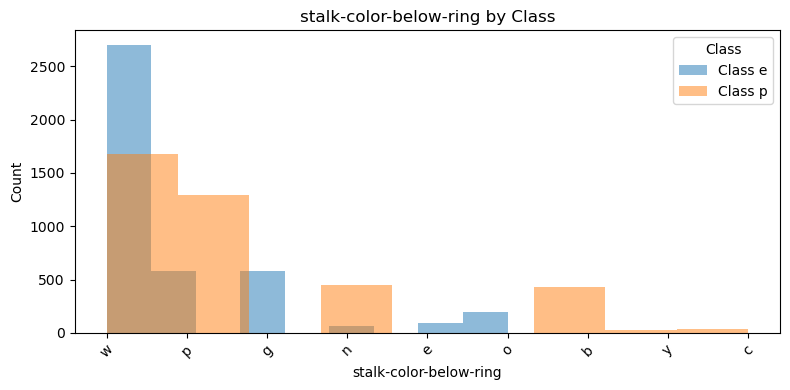

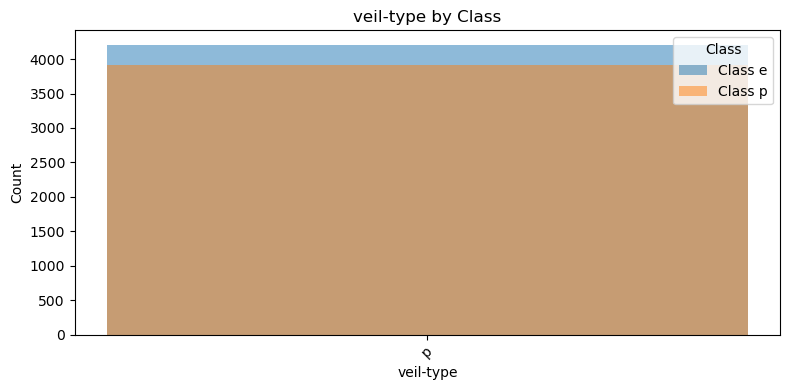

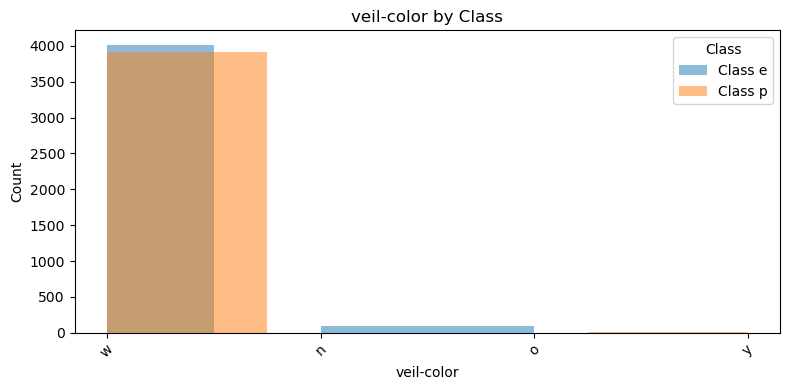

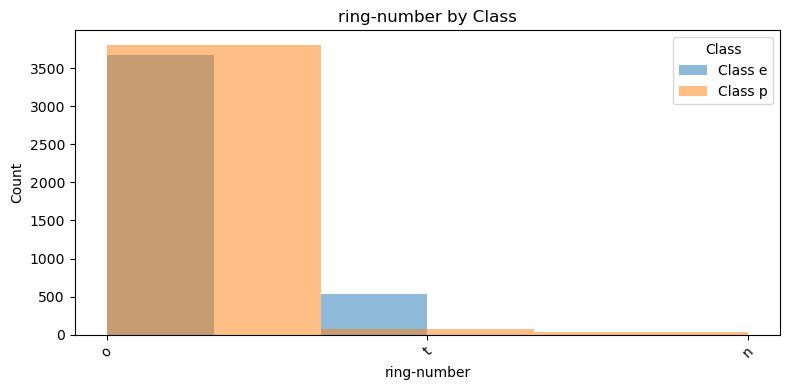

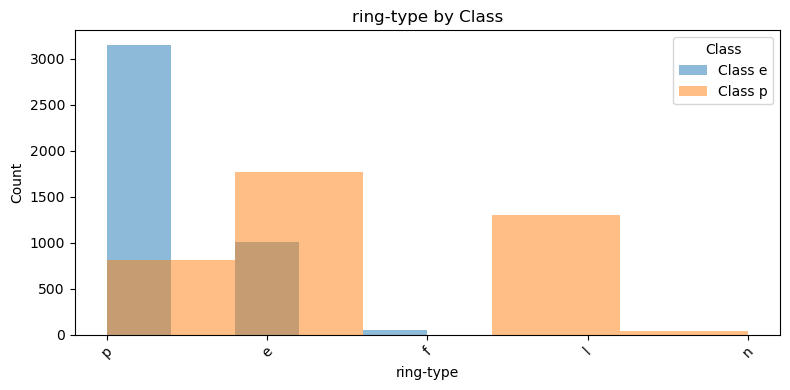

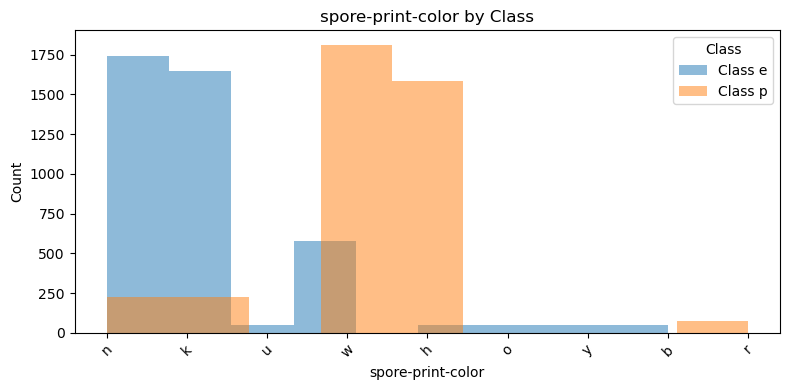

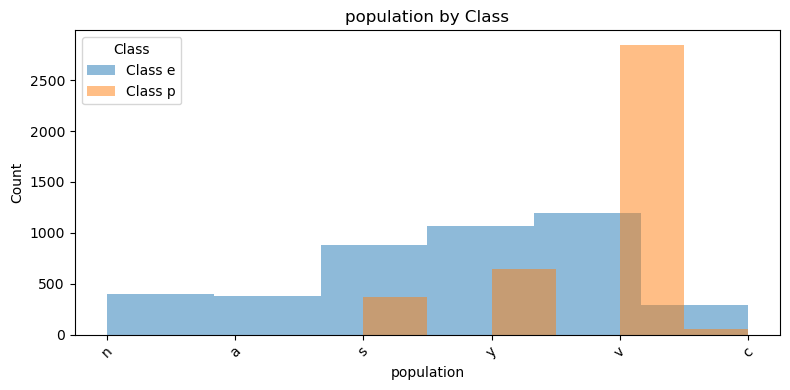

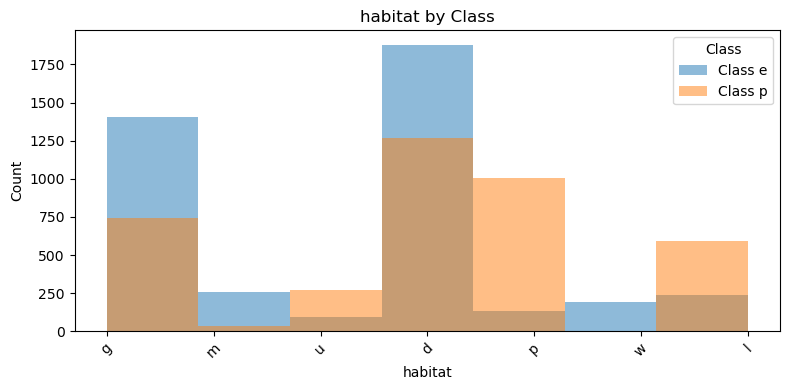

In [46]:
# Histograms for each feature
import matplotlib.pyplot as plt

for feature in df.columns:
    if feature == 'class':  # Except Target 
        continue

    plt.figure(figsize=(8, 4))
    plt.title(f"{feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Count")

    for cls in ['e', 'p']:
        data = df[df['class'] == cls][feature]
        plt.hist(data, bins=len(df[feature].unique()), alpha=0.5, label=f'Class {cls}')
    plt.legend(title="Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



* Note that for categorical features, often times the information in the histogram could be better presented in a table.    

The summary tables below displays exact values corresponding to the distributions shown above.

In [47]:
from IPython.display import display, HTML

for col in df.columns:
    if col != 'class':
        print(f"\nFeature: {col}")
        table = pd.crosstab(df[col], df['class'])
        display(HTML(table.to_html()))


Feature: cap-shape


class,e,p
cap-shape,,
b,404,48
c,0,4
f,1596,1556
k,228,600
s,32,0
x,1948,1708



Feature: cap-surface


class,e,p
cap-surface,,
f,1560,760
g,0,4
s,1144,1412
y,1504,1740



Feature: cap-color


class,e,p
cap-color,,
b,48,120
c,32,12
e,624,876
g,1032,808
n,1264,1020
p,56,88
r,16,0
u,16,0
w,720,320



Feature: bruises


class,e,p
bruises,,
f,1456,3292
t,2752,624



Feature: odor


class,e,p
odor,,
a,400,0
c,0,192
f,0,2160
l,400,0
m,0,36
n,3408,120
p,0,256
s,0,576
y,0,576



Feature: gill-attachment


class,e,p
gill-attachment,,
a,192,18
f,4016,3898



Feature: gill-spacing


class,e,p
gill-spacing,,
c,3008,3804
w,1200,112



Feature: gill-size


class,e,p
gill-size,,
b,3920,1692
n,288,2224



Feature: gill-color


class,e,p
gill-color,,
b,0,1728
e,96,0
g,248,504
h,204,528
k,344,64
n,936,112
o,64,0
p,852,640
r,0,24



Feature: stalk-shape


class,e,p
stalk-shape,,
e,1616,1900
t,2592,2016



Feature: stalk-root


class,e,p
stalk-root,,
?,720,1760
b,1920,1856
c,512,44
e,864,256
r,192,0



Feature: stalk-surface-above-ring


class,e,p
stalk-surface-above-ring,,
f,408,144
k,144,2228
s,3640,1536
y,16,8



Feature: stalk-surface-below-ring


class,e,p
stalk-surface-below-ring,,
f,456,144
k,144,2160
s,3400,1536
y,208,76



Feature: stalk-color-above-ring


class,e,p
stalk-color-above-ring,,
b,0,432
c,0,36
e,96,0
g,576,0
n,16,432
o,192,0
p,576,1296
w,2752,1712
y,0,8



Feature: stalk-color-below-ring


class,e,p
stalk-color-below-ring,,
b,0,432
c,0,36
e,96,0
g,576,0
n,64,448
o,192,0
p,576,1296
w,2704,1680
y,0,24



Feature: veil-type


class,e,p
veil-type,,
p,4208,3916



Feature: veil-color


class,e,p
veil-color,,
n,96,0
o,96,0
w,4016,3908
y,0,8



Feature: ring-number


class,e,p
ring-number,,
n,0,36
o,3680,3808
t,528,72



Feature: ring-type


class,e,p
ring-type,,
e,1008,1768
f,48,0
l,0,1296
n,0,36
p,3152,816



Feature: spore-print-color


class,e,p
spore-print-color,,
b,48,0
h,48,1584
k,1648,224
n,1744,224
o,48,0
r,0,72
u,48,0
w,576,1812
y,48,0



Feature: population


class,e,p
population,,
a,384,0
c,288,52
n,400,0
s,880,368
v,1192,2848
y,1064,648



Feature: habitat


class,e,p
habitat,,
d,1880,1268
g,1408,740
l,240,592
m,256,36
p,136,1008
u,96,272
w,192,0


<Figure size 800x400 with 0 Axes>

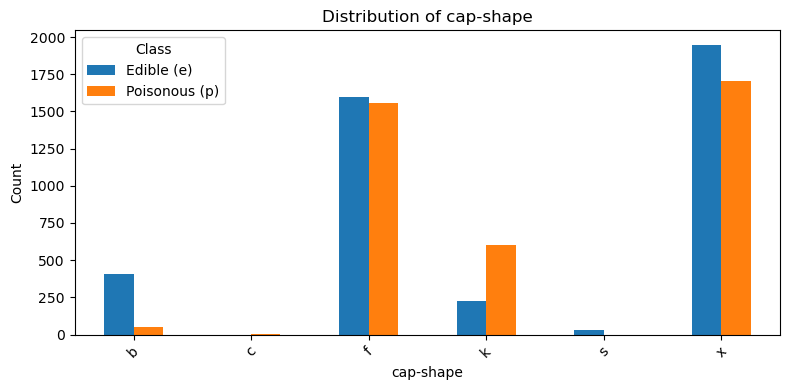

<Figure size 800x400 with 0 Axes>

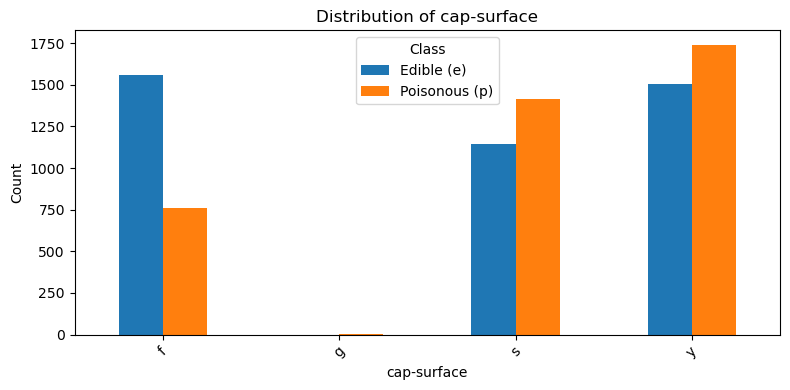

<Figure size 800x400 with 0 Axes>

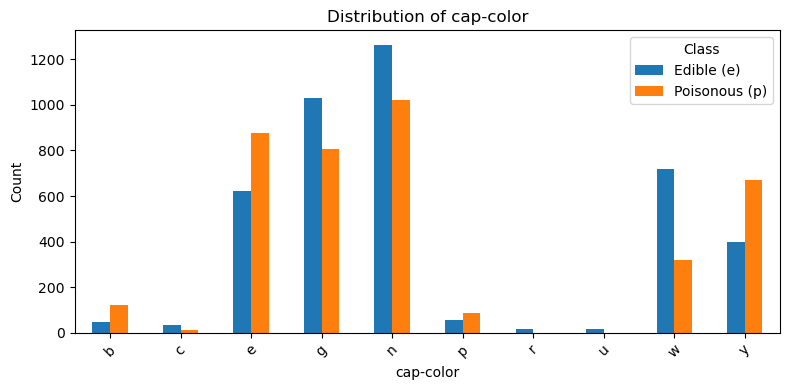

<Figure size 800x400 with 0 Axes>

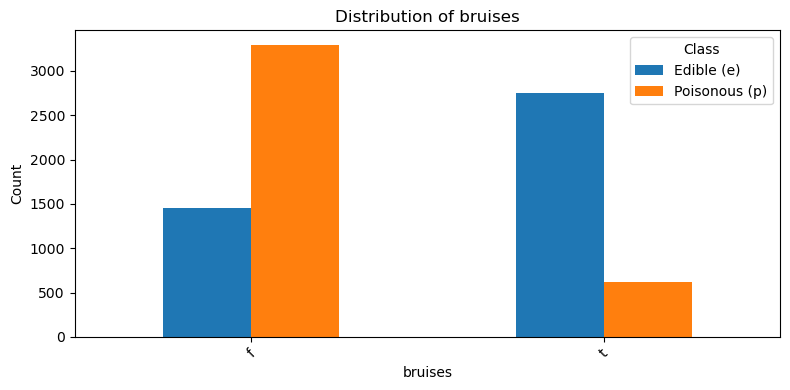

<Figure size 800x400 with 0 Axes>

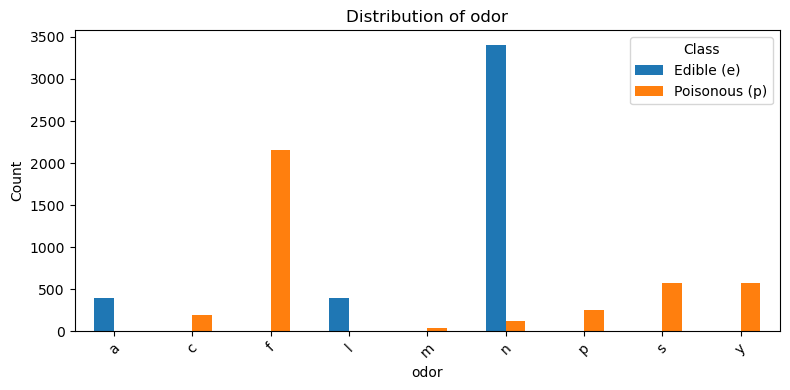

<Figure size 800x400 with 0 Axes>

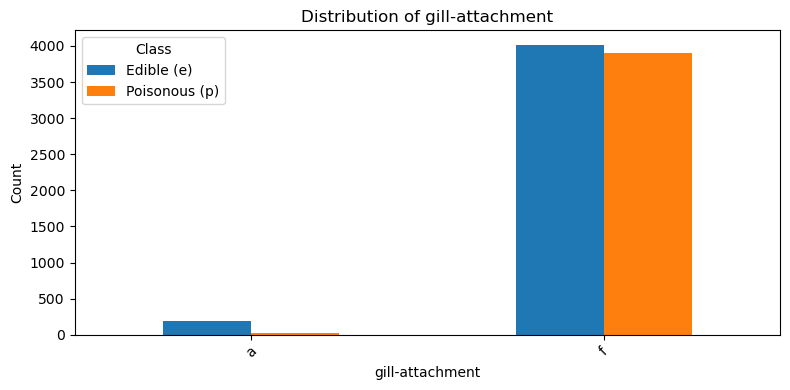

<Figure size 800x400 with 0 Axes>

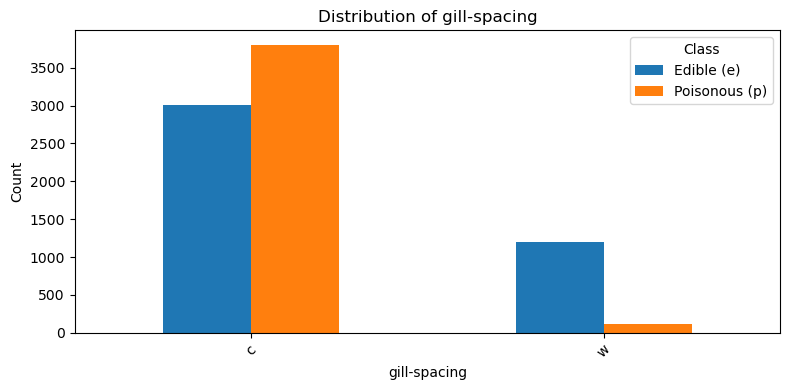

<Figure size 800x400 with 0 Axes>

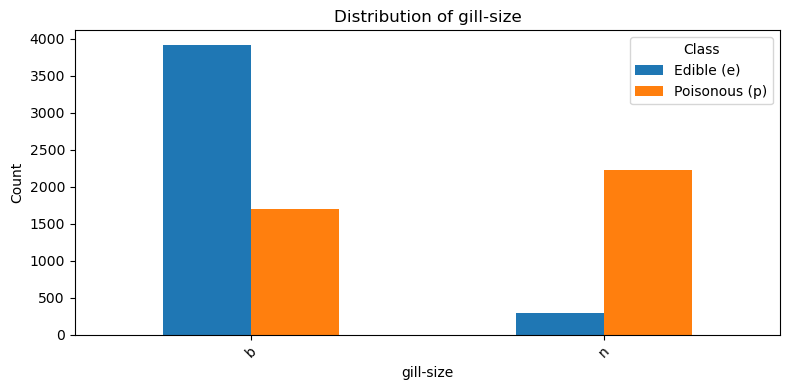

<Figure size 800x400 with 0 Axes>

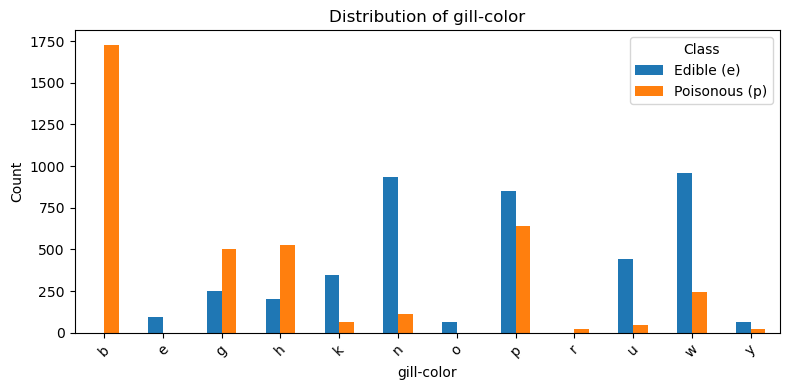

<Figure size 800x400 with 0 Axes>

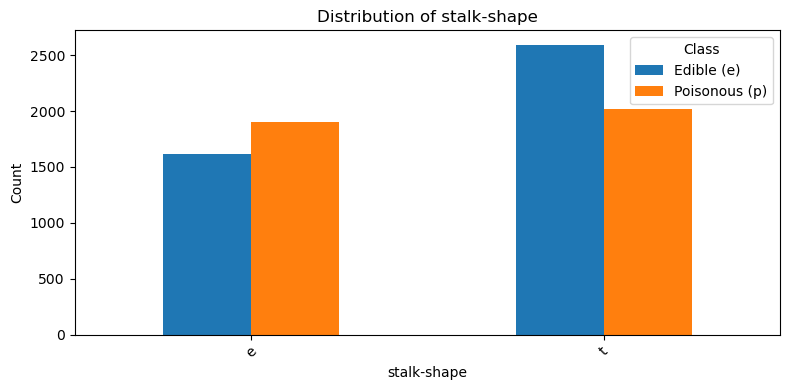

<Figure size 800x400 with 0 Axes>

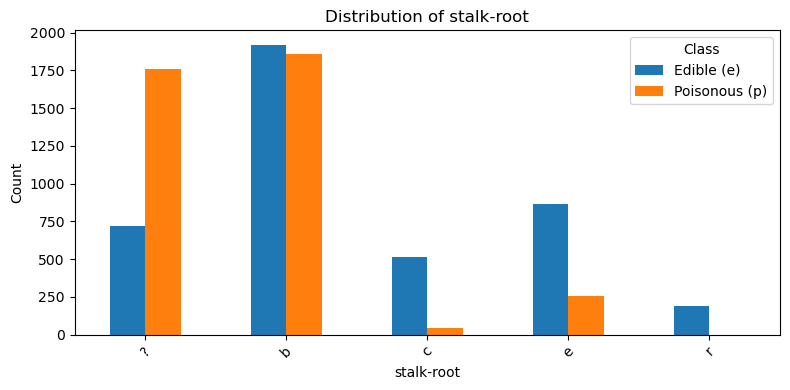

<Figure size 800x400 with 0 Axes>

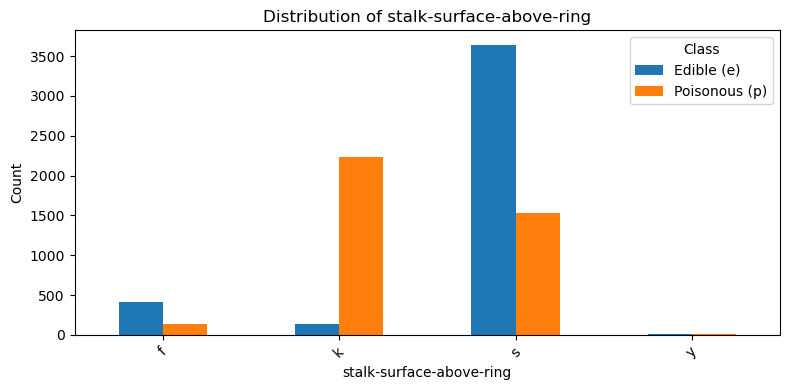

<Figure size 800x400 with 0 Axes>

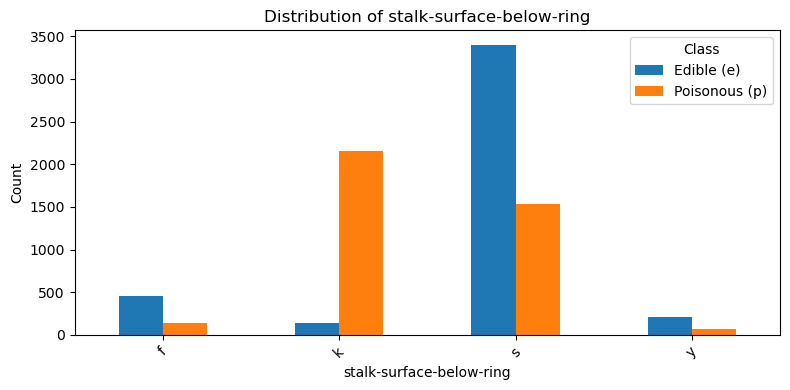

<Figure size 800x400 with 0 Axes>

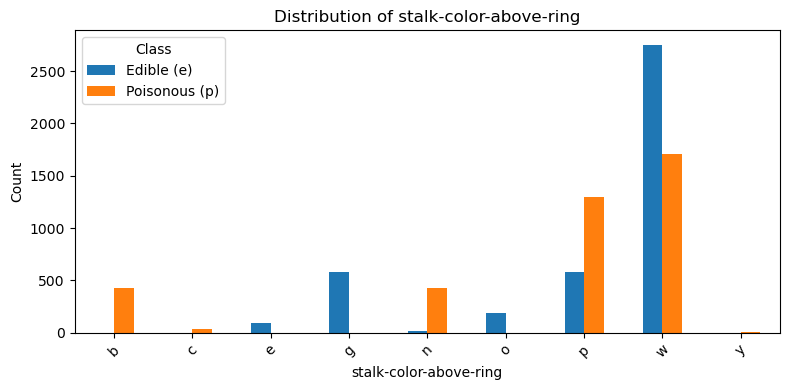

<Figure size 800x400 with 0 Axes>

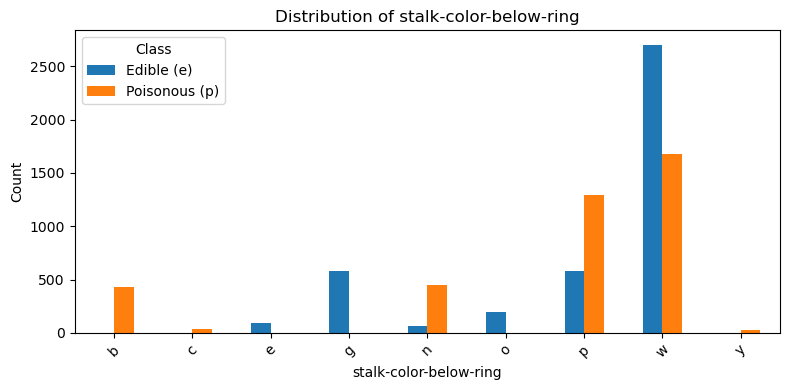

<Figure size 800x400 with 0 Axes>

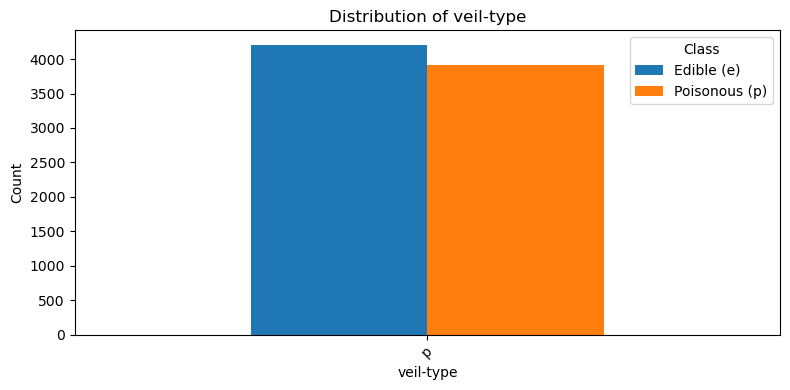

<Figure size 800x400 with 0 Axes>

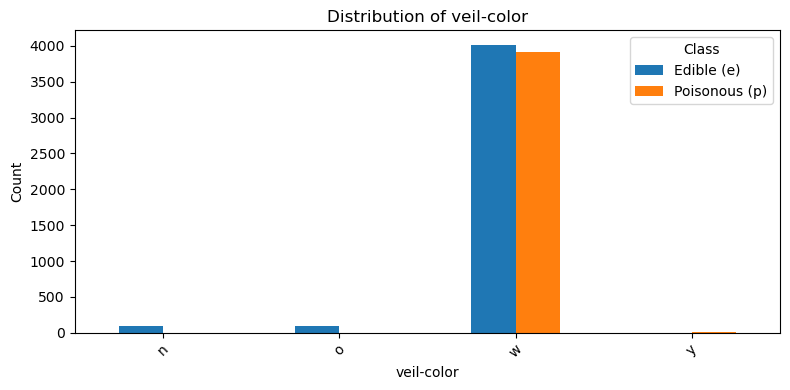

<Figure size 800x400 with 0 Axes>

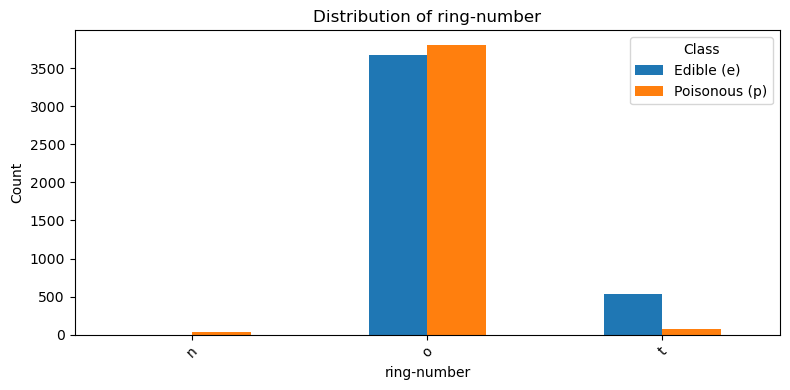

<Figure size 800x400 with 0 Axes>

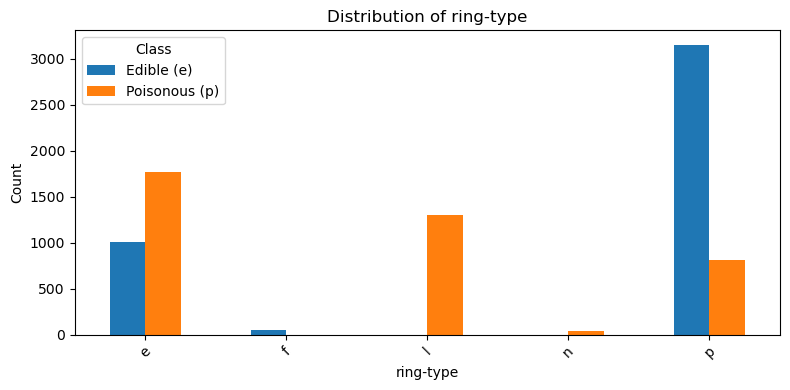

<Figure size 800x400 with 0 Axes>

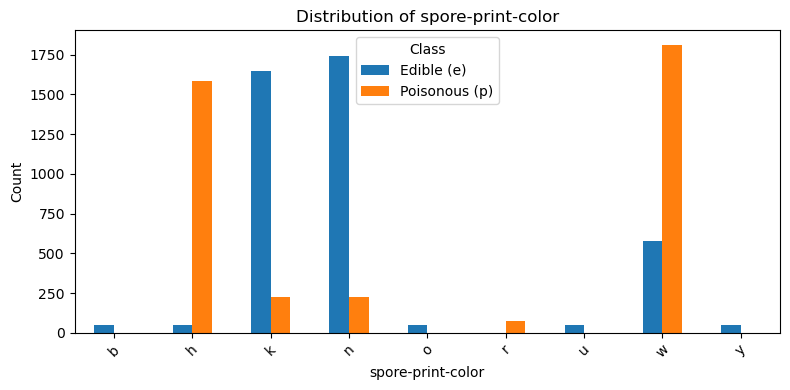

<Figure size 800x400 with 0 Axes>

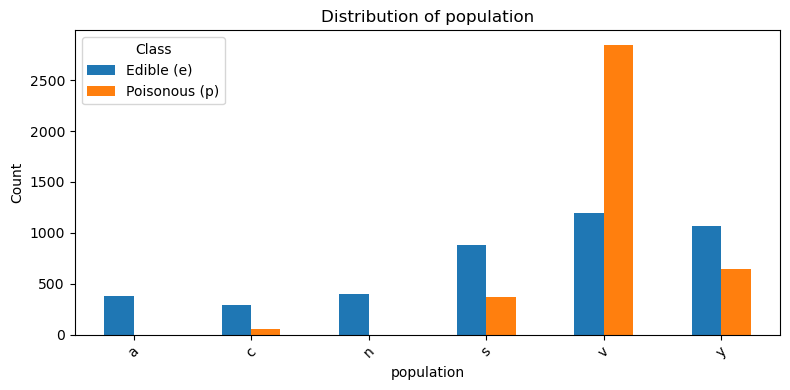

<Figure size 800x400 with 0 Axes>

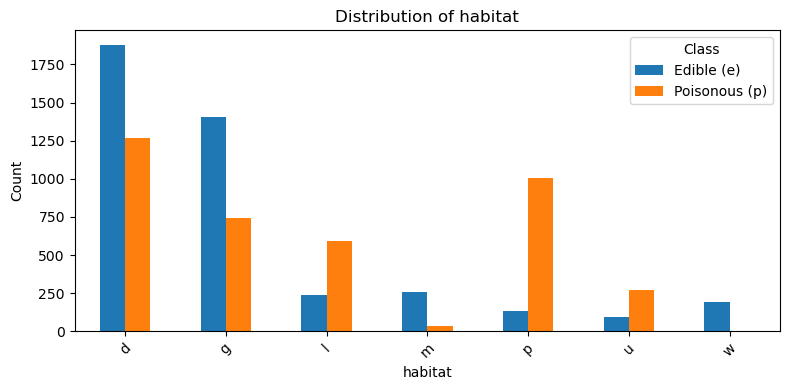

In [48]:
# Bar Plots for each feature
import matplotlib.pyplot as plt

for col in df.columns:
    if col != 'class':    # Except Target
        plt.figure(figsize=(8, 4))
        
        # Create a crosstabulation for categortical features
        cross_tab = pd.crosstab(df[col], df['class'])
        
        cross_tab.plot(kind='bar', figsize=(8, 4))
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='Class', labels=['Edible (e)', 'Poisonous (p)'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

* Make comments on what features look most promising for ML task.

I first created histograms and summary tables to explore how each feature is distributed across edible and poisonous classes. However, since my dataset contains only categorical features, I used bar graphs instead which seemed more appropriate for visualizing category counts.

From the bar graphs, certain features stood out as promising for classification. F

Because these features demonstrate clear separation between edible and poisonous mushrooms, they are likely to be important predictors for a machine learning model. I will now explore these specific features further using stacked bar charts.

<Figure size 640x480 with 0 Axes>

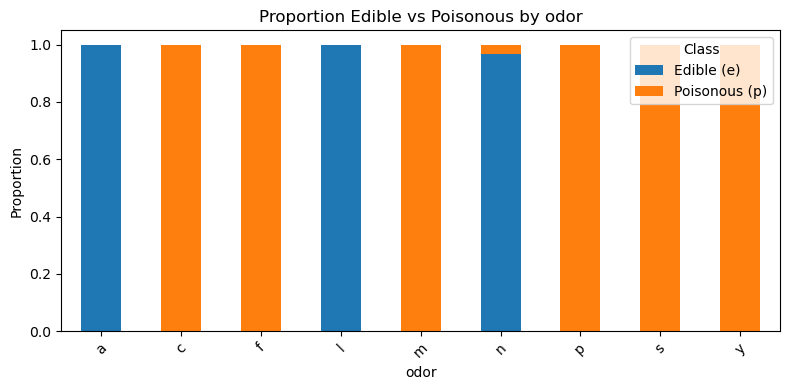

<Figure size 640x480 with 0 Axes>

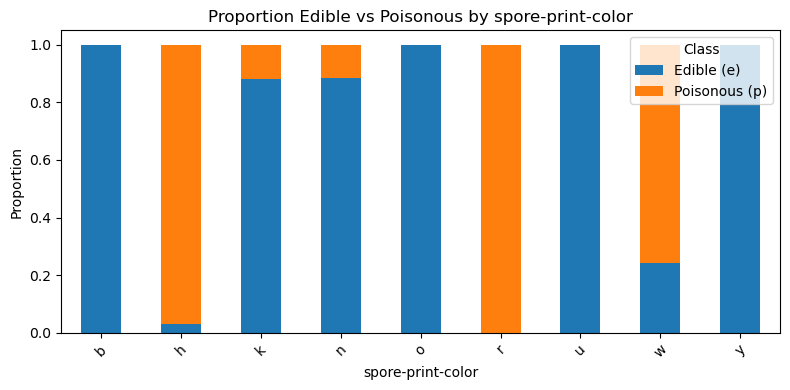

<Figure size 640x480 with 0 Axes>

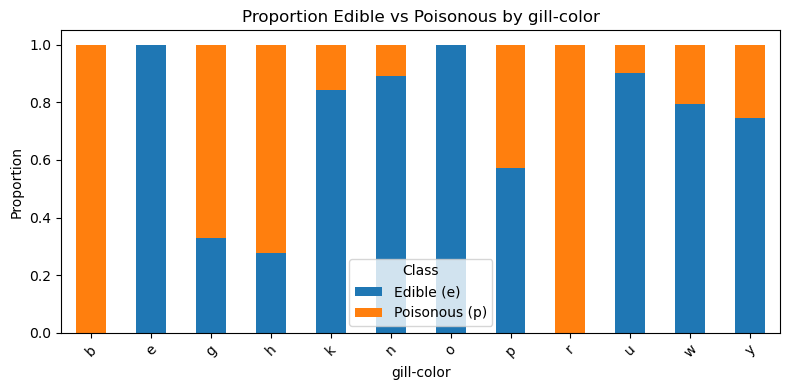

<Figure size 640x480 with 0 Axes>

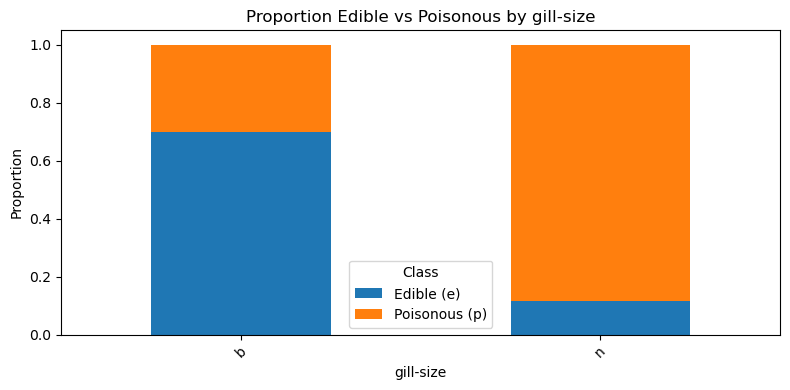

<Figure size 640x480 with 0 Axes>

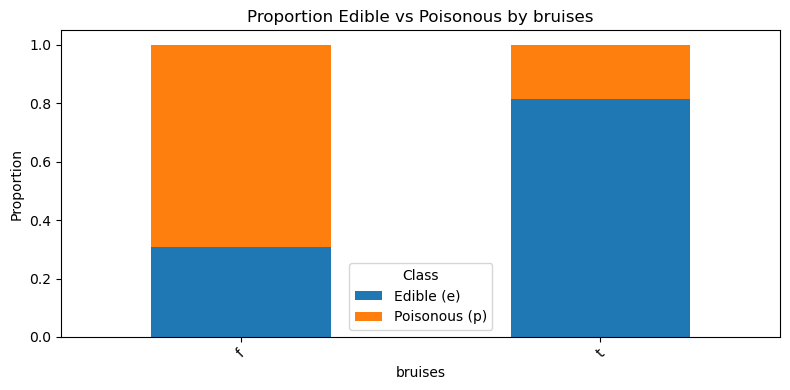

In [49]:
top_features = ['odor', 'spore-print-color', 'gill-color', 'gill-size', 'bruises']

# Stacked bar charts showing the proportion of edible vs. poisonous for each category
for feature in top_features:
    # Compute row‐normalized crosstab so each bar sums to 1
    prop_tab = pd.crosstab(df[feature], df['class'], normalize='index')
    
    # Plot as stacked bars
    plt.figure()
    prop_tab.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f'Proportion Edible vs Poisonous by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title='Class', labels=['Edible (e)', 'Poisonous (p)'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

<Figure size 640x480 with 0 Axes>

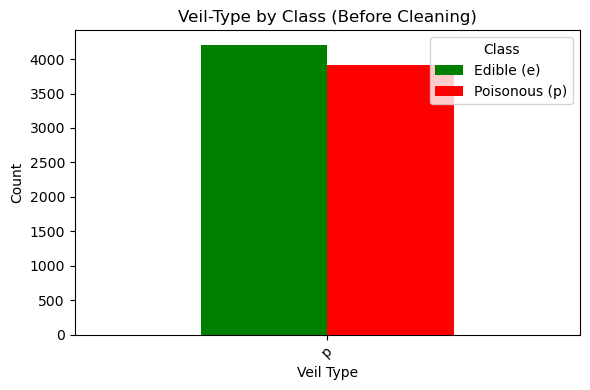

<Figure size 640x480 with 0 Axes>

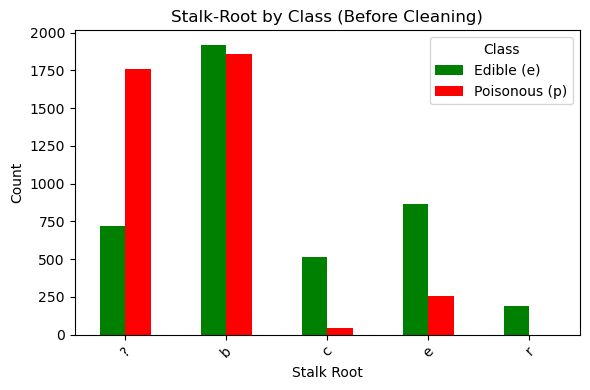

In [50]:
# Visualize before cleaning

# Veil-type by class (before cleaning)
veil_crosstab = pd.crosstab(df['veil-type'], df['class'])
plt.figure()
veil_crosstab.plot(kind='bar', color=['green', 'red'], figsize=(6, 4))
plt.title("Veil-Type by Class (Before Cleaning)")
plt.xlabel("Veil Type")
plt.ylabel("Count")
plt.legend(title='Class', labels=['Edible (e)', 'Poisonous (p)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stalk-root by class (before cleaning)
stalk_crosstab = pd.crosstab(df['stalk-root'], df['class'])
plt.figure()
stalk_crosstab.plot(kind='bar', color=['green', 'red'], figsize=(6, 4))
plt.title("Stalk-Root by Class (Before Cleaning)")
plt.xlabel("Stalk Root")
plt.ylabel("Count")
plt.legend(title='Class', labels=['Edible (e)', 'Poisonous (p)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
# Make a copy of dataset
df_cleaned = df.copy()

# Drop columns which has no variability
df_cleaned = df_cleaned.drop(columns=['veil-type'])

# Replace '?' in 'stalk-root' with new category label 'missing'
df_cleaned['stalk-root'] = df_cleaned['stalk-root'].replace('?', 'missing')

print("Shape before cleaning:", df.shape)
print("Shape after cleaning :", df_cleaned.shape)
print("\nMissing values left:")
print(df_cleaned.isnull().sum())

Shape before cleaning: (8124, 23)
Shape after cleaning : (8124, 22)

Missing values left:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


<Figure size 640x480 with 0 Axes>

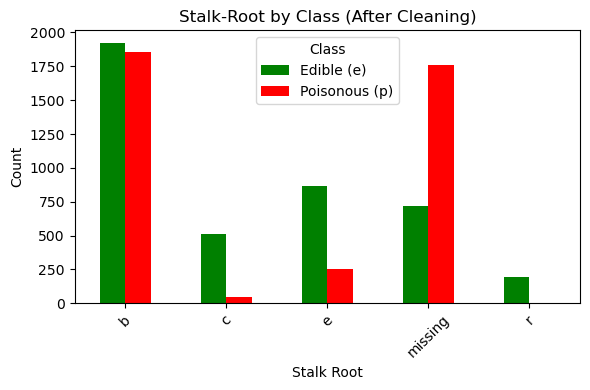

In [52]:
# Visualizing after cleaning

# Stalk-root by class (after cleaning)
sr = pd.crosstab(df_cleaned['stalk-root'], df_cleaned['class'])
plt.figure()
sr.plot(kind='bar', figsize=(6, 4), color=['green', 'red'])
plt.title("Stalk-Root by Class (After Cleaning)")
plt.xlabel("Stalk Root")
plt.ylabel("Count")
plt.legend(title="Class", labels=['Edible (e)', 'Poisonous (p)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
# Separate target and features
X = df_cleaned.drop('class', axis=1)  # Features
y = df_cleaned['class']               # Target

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Map target labels
y_encoded = y.map({'e': 0, 'p': 1})

# Add the target column back to the encoded DataFrame
df_encoded = X_encoded.copy()
df_encoded['class'] = y_encoded

print("Encoded feature matrix (first 5 rows):")
print(X_encoded.head())

Encoded feature matrix (first 5 rows):
   cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        False        False        False        False         True   
1        False        False        False        False         True   
2        False        False        False        False        False   
3        False        False        False        False         True   
4        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  ...  \
0          False           True          False        False        False  ...   
1          False           True          False        False        False  ...   
2          False           True          False        False        False  ...   
3          False          False           True        False        False  ...   
4          False           True          False        False        False  ...   

   population_n  population_s  population_v  populati

## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.



In [54]:
# Split training sample into train, validation, and test

from sklearn.model_selection import train_test_split

X_final = df_encoded.drop('class', axis=1)
y_final = df_encoded['class']

# Split data for training(60%) and temporary(40%)
X_train, X_temp, y_train, y_temp = train_test_split(X_final, y_final, test_size=0.4, stratify=y_final, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Sample counts in each split
print(f"Training: {X_train.shape[0]} rows, Validation: {X_val.shape[0]} rows, Test: {X_test.shape[0]} rows")


Training: 4874 rows, Validation: 1625 rows, Test: 1625 rows


### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)



### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.


In [56]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=["Edible (0)", "Poisonous (1)"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))




Validation Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

   Edible (0)       1.00      1.00      1.00       841
Poisonous (1)       1.00      1.00      1.00       784

     accuracy                           1.00      1625
    macro avg       1.00      1.00      1.00      1625
 weighted avg       1.00      1.00      1.00      1625


Confusion Matrix:
[[841   0]
 [  0 784]]


### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.

In [57]:
import pandas as pd
final_pred = model.predict(X_test) 

# Map to class labels
final_labels = pd.Series(final_pred).map({0: 'e', 1: 'p'})

submission_df = pd.DataFrame({'Index': X_test.index,   
                              'class': final_labels
                             })

# Saving submission file
submission_df.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' has been successfully created.")
print(submission_df.head())

Submission file 'submission.csv' has been successfully created.
   Index class
0   2228     e
1   6648     p
2   5917     e
3   6761     p
4   3100     e


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)  
}

for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    
    clf.fit(X_train, y_train)
    
    y_val_pred = clf.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred, target_names=['Edible (0)', 'Poisonous (1)']))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))



=== Random Forest ===
Validation Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

   Edible (0)       1.00      1.00      1.00       841
Poisonous (1)       1.00      1.00      1.00       784

     accuracy                           1.00      1625
    macro avg       1.00      1.00      1.00      1625
 weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[841   0]
 [  0 784]]

=== Logistic Regression ===
Validation Accuracy: 99.75%

Classification Report:
               precision    recall  f1-score   support

   Edible (0)       1.00      1.00      1.00       841
Poisonous (1)       1.00      0.99      1.00       784

     accuracy                           1.00      1625
    macro avg       1.00      1.00      1.00      1625
 weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[841   0]
 [  4 780]]


/tmp/ipykernel_468/1919830025.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='flare')


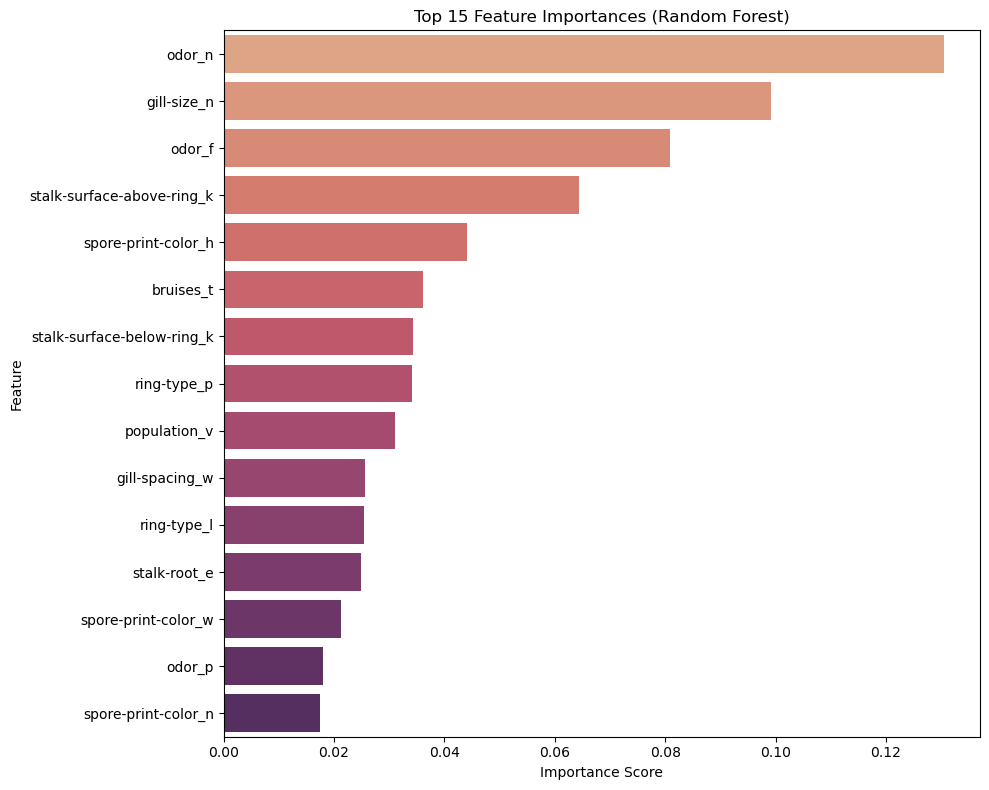

In [63]:
importances = model.feature_importances_ 
feature_names = X_train.columns  

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='flare')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

